In [1]:
import numpy as np             # Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
mobile_credit=pd.read_csv(r"C:\Users\Akash\Desktop\FLIP ROBO\Flip Robo Projects\Project 1 - Micro Credit Defaulter\Data file.csv")
# Importing the Data from CSV file to Python

In [3]:
mobile_credit

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

            pdate  
0       7/20/2016  
1       8/10/2016  
2       8/19/2016  
3        6/6/2016  
4       6/22/2016  
...           ...  
209588  6/17/2016  
209589  6/12/2016  
209590  7/29/2016  
209591  7/25/2016  
209592   7/7/2016  

[209593 rows x 37 columns]

In [4]:
mobile_credit.columns # Shows all the Columns present in the Dataset

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
mobile_credit=pd.DataFrame(data=mobile_credit)   # Converting the Data into Structured DataFrame

In [6]:
mobile_credit

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

            pdate  
0       7/20/2016  
1       8/10/2016  
2       8/19/2016  
3        6/6/2016  
4       6/22/2016  
...           ...  
209588  6/17/2016  
209589  6/12/2016  
209590  7/29/2016  
209591  7/25/2016  
209592   7/7/2016  

[209593 rows x 37 columns]

In [7]:
mobile_credit.drop(columns="Unnamed: 0",inplace=True) 
# Dropping of column "Unnamed: 0" as it is showing serial numbers twice

In [8]:
mobile_credit.dtypes # Observing the Data Types of all the variables in the Dataset

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [9]:
mobile_credit.isnull().sum()  # There is no missing values present in the Dataset

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
mobile_credit.info() # Info gives the data type and the missing values of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [11]:
# The pdate column is a Date column we will make 3 new columns and extract year, month and day respectively

In [12]:
mobile_credit['pdate_year'] = pd.DatetimeIndex(mobile_credit['pdate']).year
# Extracting and making the new column with year 

In [13]:
mobile_credit

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  pcircle      pdate  \
0                      0.0  29.000000  29.000000      UPW  7/20/2016   
1                      0.0   0.000000   0.000000      UPW  8/10/2016   
2                      0.0   0.000000   0.000000      UPW  8/19/2016   
3                      0.0   0.000000   0.000000      UPW   6/6/2016   
4                      0.0   2.333333   2.333333      UPW  6/22/2016   
...                    ...        ...        ...      ...        ...   
209588                 0.0   1.000000   1.000000      UPW  6/17/2016   
209589                 0.0   1.000000   1.000000      UPW  6/12/2016   
209590                 0.0   4.000000   3.833333      UPW  7/29/2016   
209591                 0.0   0.000000  10.500000      UPW  7/25/2016   
209592                 0.0   0.000000   0.000000      UPW   7/7/2016   

        pdate_year  
0             2016  
1             2016  
2             2016  
3             2016  
4             2016  
...            ...  
209588        2016  
209589        2016  
209590        2016  
209591        2016  
209592        2016  

[209593 rows x 37 columns]

In [14]:
mobile_credit['pdate_month'] = pd.DatetimeIndex(mobile_credit['pdate']).month
# Extracting and making the new column with month

In [15]:
mobile_credit

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  pcircle      pdate  pdate_year  pdate_month  
0       29.000000  29.000000      UPW  7/20/2016        2016            7  
1        0.000000   0.000000      UPW  8/10/2016        2016            8  
2        0.000000   0.000000      UPW  8/19/2016        2016            8  
3        0.000000   0.000000      UPW   6/6/2016        2016            6  
4        2.333333   2.333333      UPW  6/22/2016        2016            6  
...           ...        ...      ...        ...         ...          ...  
209588   1.000000   1.000000      UPW  6/17/2016        2016            6  
209589   1.000000   1.000000      UPW  6/12/2016        2016            6  
209590   4.000000   3.833333      UPW  7/29/2016        2016            7  
209591   0.000000  10.500000      UPW  7/25/2016        2016            7  
209592   0.000000   0.000000      UPW   7/7/2016        2016            7  

[209593 rows x 38 columns]

In [16]:
mobile_credit['pdate_day'] = pd.DatetimeIndex(mobile_credit['pdate']).day
# Extracting and making the new column with day

In [17]:
mobile_credit

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90  pcircle      pdate  pdate_year  pdate_month  pdate_day  
0       29.000000      UPW  7/20/2016        2016            7         20  
1        0.000000      UPW  8/10/2016        2016            8         10  
2        0.000000      UPW  8/19/2016        2016            8         19  
3        0.000000      UPW   6/6/2016        2016            6          6  
4        2.333333      UPW  6/22/2016        2016            6         22  
...           ...      ...        ...         ...          ...        ...  
209588   1.000000      UPW  6/17/2016        2016            6         17  
209589   1.000000      UPW  6/12/2016        2016            6         12  
209590   3.833333      UPW  7/29/2016        2016            7         29  
209591  10.500000      UPW  7/25/2016        2016            7         25  
209592   0.000000      UPW   7/7/2016        2016            7          7  

[209593 rows x 39 columns]

In [18]:
mobile_credit.drop(columns="pdate",inplace=True) 
# Now, we have extracted Year, Month & Day from the pdate column, so we will drop it

In [19]:
mobile_credit

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  pcircle  pdate_year  pdate_month  pdate_day  
0       29.000000  29.000000      UPW        2016            7         20  
1        0.000000   0.000000      UPW        2016            8         10  
2        0.000000   0.000000      UPW        2016            8         19  
3        0.000000   0.000000      UPW        2016            6          6  
4        2.333333   2.333333      UPW        2016            6         22  
...           ...        ...      ...         ...          ...        ...  
209588   1.000000   1.000000      UPW        2016            6         17  
209589   1.000000   1.000000      UPW        2016            6         12  
209590   4.000000   3.833333      UPW        2016            7         29  
209591   0.000000  10.500000      UPW        2016            7         25  
209592   0.000000   0.000000      UPW        2016            7          7  

[209593 rows x 38 columns]

In [20]:
mobile_credit.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [21]:
mobile_credit["pcircle"].value_counts() # All values are assigned with same tag UPW

UPW    209593
Name: pcircle, dtype: int64

In [22]:
mobile_credit.drop(columns=["pcircle"],inplace=True) # Since all values are UPW then we will drop this column

In [23]:
mobile_credit

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  pdate_year  pdate_month  \
0                      0.0  29.000000  29.000000        2016            7   
1                      0.0   0.000000   0.000000        2016            8   
2                      0.0   0.000000   0.000000        2016            8   
3                      0.0   0.000000   0.000000        2016            6   
4                      0.0   2.333333   2.333333        2016            6   
...                    ...        ...        ...         ...          ...   
209588                 0.0   1.000000   1.000000        2016            6   
209589                 0.0   1.000000   1.000000        2016            6   
209590                 0.0   4.000000   3.833333        2016            7   
209591                 0.0   0.000000  10.500000        2016            7   
209592                 0.0   0.000000   0.000000        2016            7   

        pdate_day  
0              20  
1              10  
2              19  
3               6  
4              22  
...           ...  
209588         17  
209589         12  
209590         29  
209591         25  
209592          7  

[209593 rows x 37 columns]

In [24]:
mobile_credit.drop(columns="msisdn",inplace=True) # We have to drop the mobile number Column "msisdn" to perform z Score 

In [25]:
mobile_credit

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0       ...                 0.0          2.0            12                6   
1       ...                 0.0          1.0            12               12   
2       ...                 0.0          1.0             6                6   
3       ...                 0.0          2.0            12                6   
4       ...                 0.0          7.0            42                6   
...     ...                 ...          ...           ...              ...   
209588  ...                 0.0          2.0            12                6   
209589  ...                 0.0          3.0            18                6   
209590  ...                 0.0          6.0            54               12   
209591  ...                 0.0          3.0            24               12   
209592  ...                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  pdate_year  pdate_month  \
0                      0.0  29.000000  29.000000        2016            7   
1                      0.0   0.000000   0.000000        2016            8   
2                      0.0   0.000000   0.000000        2016            8   
3                      0.0   0.000000   0.000000        2016            6   
4                      0.0   2.333333   2.333333        2016            6   
...                    ...        ...        ...         ...          ...   
209588                 0.0   1.000000   1.000000        2016            6   
209589                 0.0   1.000000   1.000000        2016            6   
209590                 0.0   4.000000   3.833333        2016            7   
209591                 0.0   0.000000  10.500000        2016            7   
209592                 0.0   0.000000   0.000000        2016            7   

        pdate_day  
0              20  
1              10  
2              19  
3               6  
4              22  
...           ...  
209588         17  
209589         12  
209590         29  
209591         25  
209592          7  

[209593 rows x 36 columns]

In [26]:
mobile_credit_corr=mobile_credit.corr() # Finding out the Correlation of the Dataset

In [27]:
mobile_credit_corr

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
pdate_year                 NaN       NaN           NaN           NaN   
pdate_month           0.154949 -0.001863      0.518664      0.539410   
pdate_day             0.006825  0.000662      0.006477     -0.021508   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002

<AxesSubplot:>

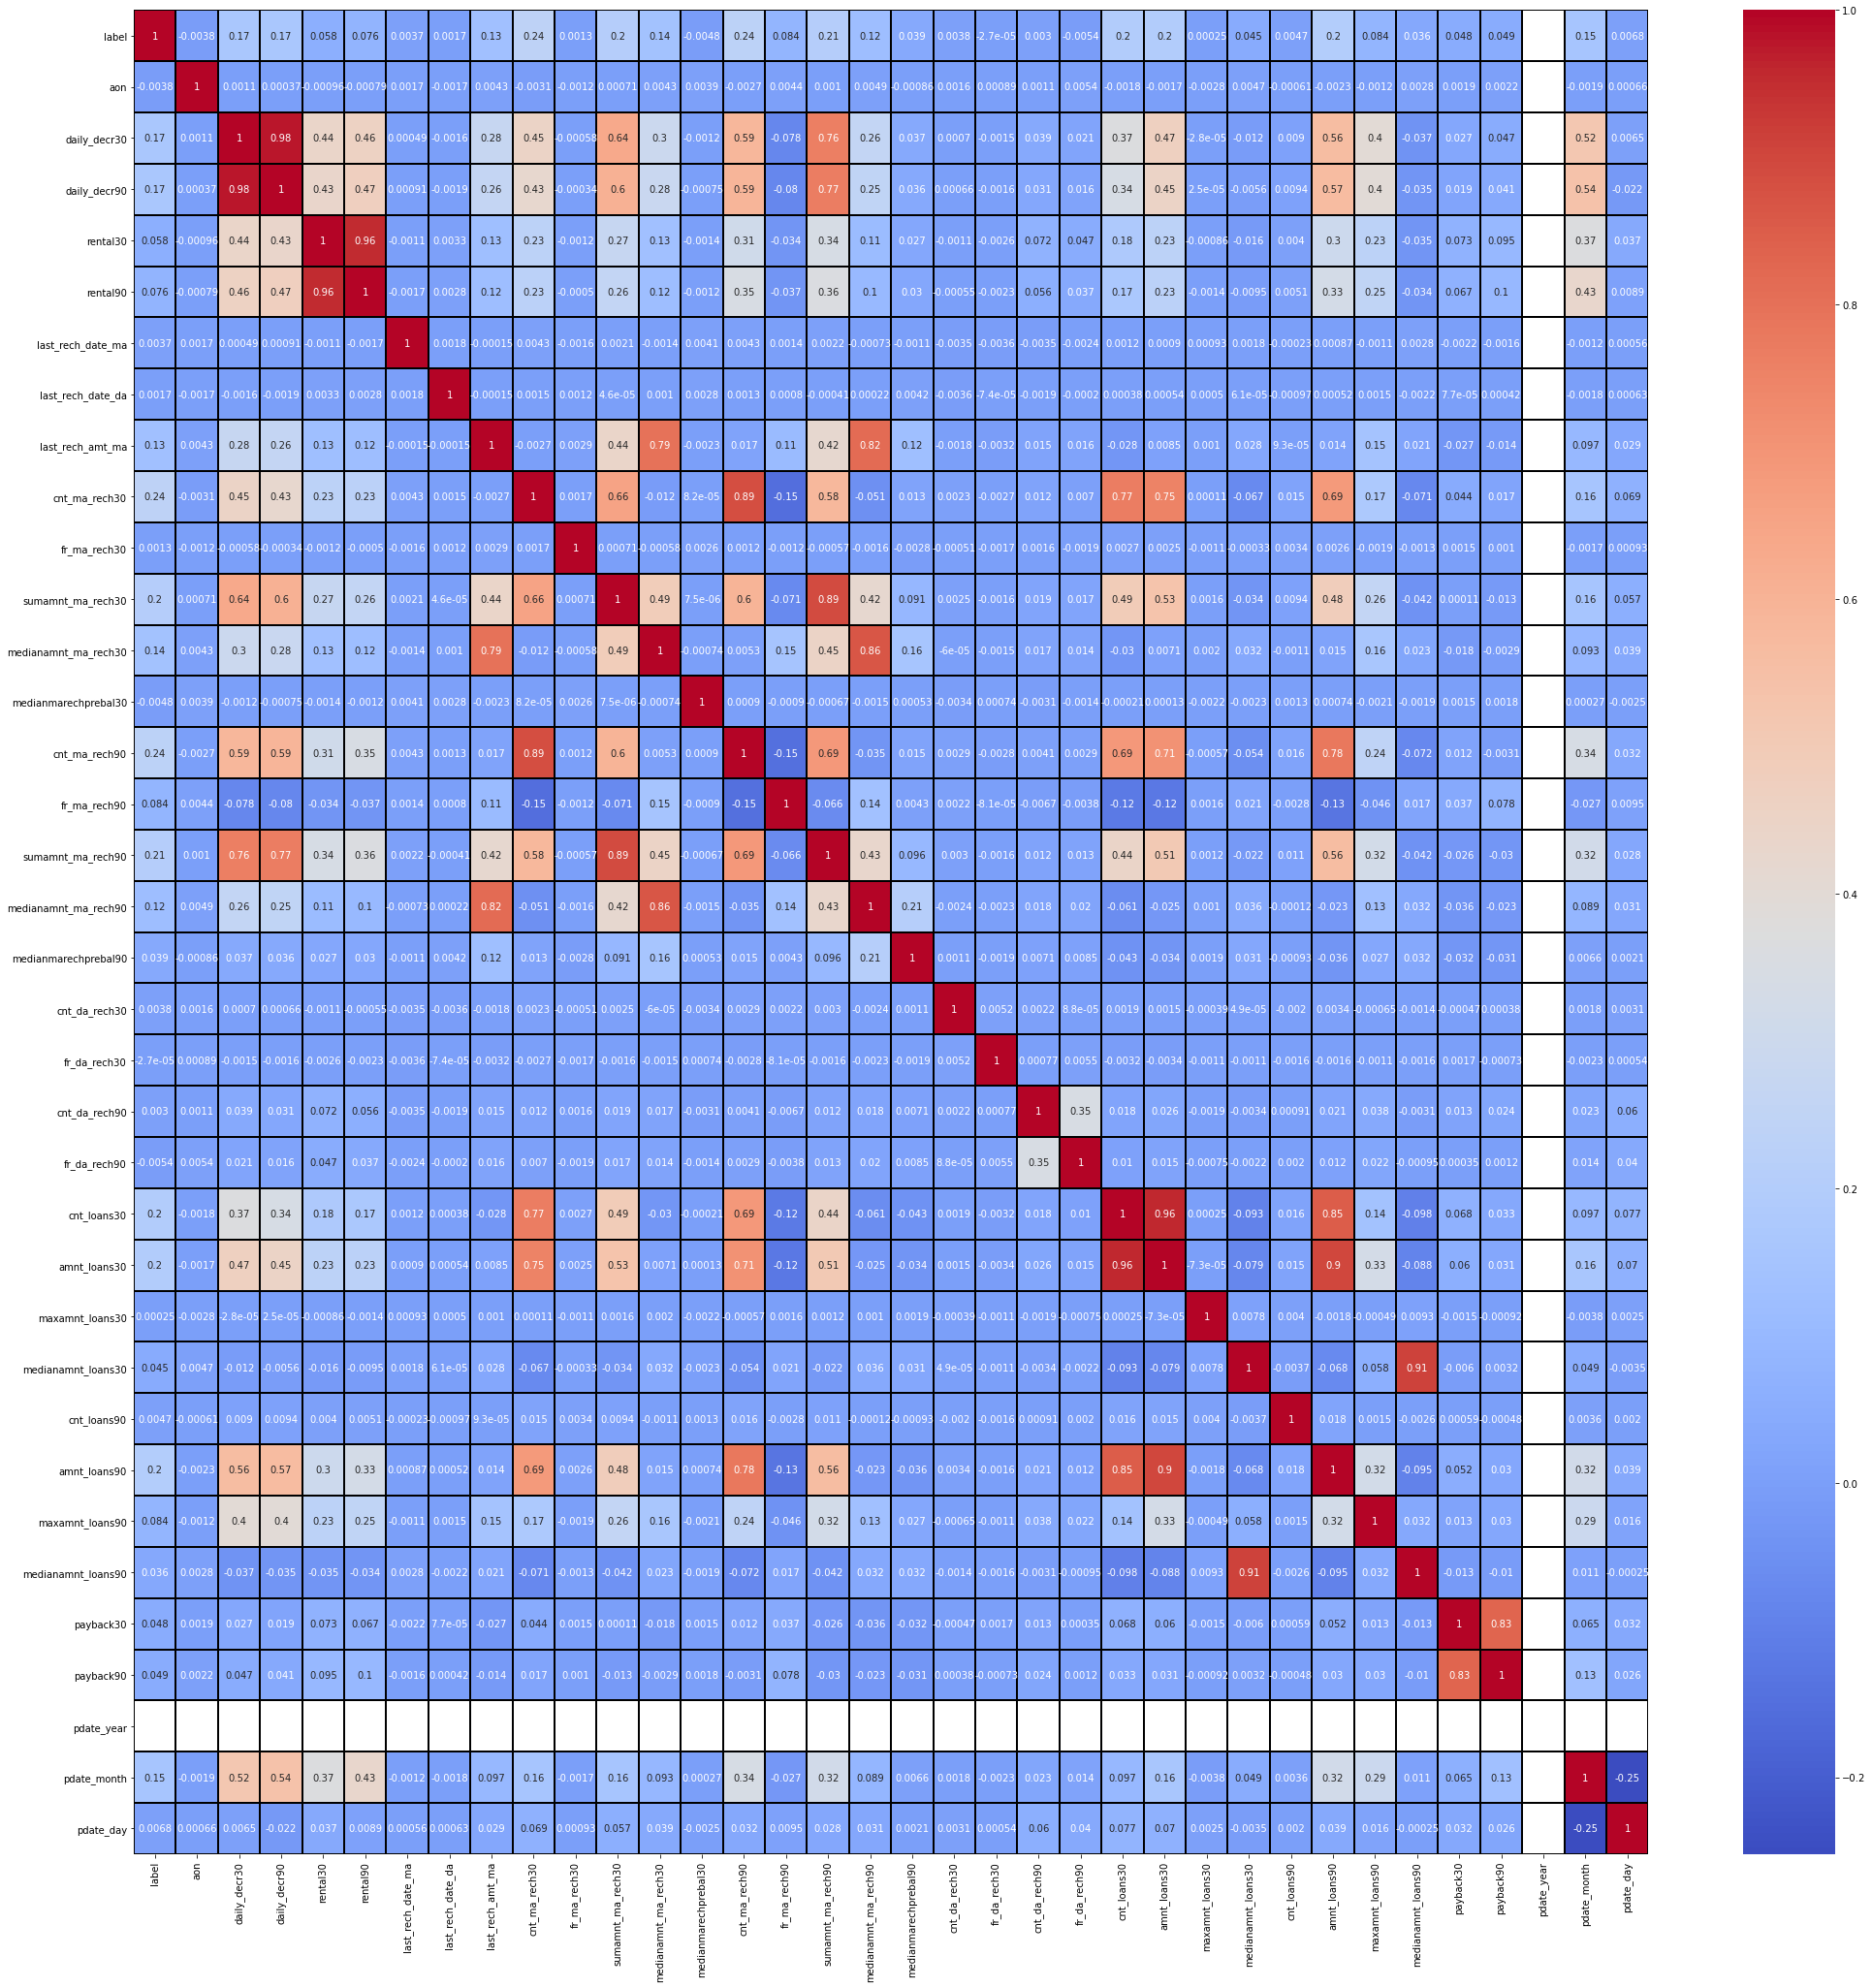

In [28]:
plt.figure(figsize=(35,35))
sns.heatmap(mobile_credit_corr, annot=True, linewidths=1, linecolor="black", cmap="coolwarm")
# Plotting the correlation matrix using Heatmap

In [29]:
mobile_credit.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate_year', 'pdate_month', 'pdate_day'],
      dtype='object')

In [30]:
mobile_credit.drop(["last_rech_date_ma","last_rech_date_da","cnt_ma_rech30","fr_ma_rech30","cnt_da_rech30","fr_da_rech30","cnt_ma_rech90","fr_ma_rech90","cnt_da_rech90","fr_da_rech90"],inplace=True,axis=1)

# We will drop these columns as they are not much corelated with the label column

In [31]:
mobile_credit

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_amt_ma  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   1539             3078.0                1539.0   
1                   5787             5787.0                5787.0   
2                   1539             1539.0                1539.0   
3                    947                0.0                   0.0   
4                   2309            20029.0                2309.0   
...                  ...                ...                   ...   
209588              4048            10404.0                3178.0   
209589               773             3092.0                 773.0   
209590              1539             9334.0                1539.0   
209591               773            12154.0                 773.0   
209592              7526             9065.0                4532.5   

        medianmarechprebal30  ...  medianamnt_loans30  cnt_loans90  \
0                       7.50  ...                 0.0          2.0   
1                      61.04  ...                 0.0          1.0   
2                      66.32  ...                 0.0          1.0   
3                       0.00  ...                 0.0          2.0   
4                      29.00  ...                 0.0          7.0   
...                      ...  ...                 ...          ...   
209588                 91.81  ...                 0.0          2.0   
209589                161.30  ...                 0.0          3.0   
209590                 51.13  ...                 0.0          6.0   
209591                164.00  ...                 0.0          3.0   
209592                356.70  ...                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90  pdate_year  pdate_month  pdate_day  
0       29.000000        2016            7         20  
1        0.000000        2016            8         10  
2        0.000000        2016            8         19  
3        0.000000        2016            6          6  
4        2.333333        2016            6         22  
...           ...         ...          ...        ...  
209588   1.000000        2016            6         17  
209589   1.000000        2016            6         12  
209590   3.833333        2016            7         29  
209591  10.500000        2016       

In [32]:
mobile_credit.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate_year', 'pdate_month', 'pdate_day'],
      dtype='object')

In [33]:
mobile_credit["pdate_year"].value_counts()

2016    209593
Name: pdate_year, dtype: int64

In [34]:
mobile_credit.drop(columns="pdate_year",inplace=True) 
# Since there are same values in the pdate_year column, we will drop it to remove the outliers using z score,
# otherwise an error will appear

In [35]:
mobile_credit

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_amt_ma  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   1539             3078.0                1539.0   
1                   5787             5787.0                5787.0   
2                   1539             1539.0                1539.0   
3                    947                0.0                   0.0   
4                   2309            20029.0                2309.0   
...                  ...                ...                   ...   
209588              4048            10404.0                3178.0   
209589               773             3092.0                 773.0   
209590              1539             9334.0                1539.0   
209591               773            12154.0                 773.0   
209592              7526             9065.0                4532.5   

        medianmarechprebal30  ...  maxamnt_loans30  medianamnt_loans30  \
0                       7.50  ...              6.0                 0.0   
1                      61.04  ...             12.0                 0.0   
2                      66.32  ...              6.0                 0.0   
3                       0.00  ...              6.0                 0.0   
4                      29.00  ...              6.0                 0.0   
...                      ...  ...              ...                 ...   
209588                 91.81  ...              6.0                 0.0   
209589                161.30  ...              6.0                 0.0   
209590                 51.13  ...             12.0                 0.0   
209591                164.00  ...             12.0                 0.0   
209592                356.70  ...             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  pdate_month  pdate_day  
0       29.000000  29.000000            7         20  
1        0.000000   0.000000            8         10  
2        0.000000   0.000000            8         19  
3        0.000000   0.000000            6          6  
4        2.333333   2.333333            6         22  
...           ...        ...          ...        ...  
209588   1.000000   1.000000            6         17  
209589   1.000000   1.000000            6         12  
209590   4.000000   3.833333 

### Outlier Treatment:-

In [36]:
X=mobile_credit.iloc[:,1:]   # Taking the indepenmdent Variables in X 

In [37]:
from scipy.stats import zscore # Importing Z Score from Scipy Library

In [38]:
z=np.abs(zscore(X)) # Applying Z Score by taking absolute of all values to make negative values into positive
z

array([[0.10357685, 0.25229941, 0.27634619, ..., 2.39409346, 0.27336037,
        0.6637208 ],
       [0.09776412, 0.73103667, 0.5533797 , ..., 0.41923266, 1.62209905,
        0.52127058],
       [0.10010243, 0.43201111, 0.42903256, ..., 0.41923266, 1.62209905,
        0.54522166],
       ...,
       [0.09378769, 0.70079045, 0.53319431, ..., 0.04735622, 0.27336037,
        1.73021304],
       [0.08428915, 0.77075515, 0.59455827, ..., 0.59938541, 0.27336037,
        1.25621649],
       [0.08628398, 0.09674426, 0.14174607, ..., 0.41923266, 0.27336037,
        0.87676799]])

In [39]:
print(np.where(z>3))  # It shows all the rows & Columns where outliers are present and value is above 3 Standard Deviation

(array([    22,     30,     30, ..., 209586, 209587, 209587], dtype=int64), array([21, 15, 19, ..., 17, 15, 19], dtype=int64))


In [40]:
z[22,21] # This is the first value where outlier is present 22nd Row and 21st column

3.6552396504846874

In [41]:
z[30,15]

4.33856016931461

In [42]:
mobile_credit_new=mobile_credit[(z<3).all(axis=1)] 
# Taking all the values within 3 Standard Deviation and storing it in new variable "mobile_credit_new" 

In [43]:
mobile_credit_new

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_amt_ma  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   1539             3078.0                1539.0   
1                   5787             5787.0                5787.0   
2                   1539             1539.0                1539.0   
3                    947                0.0                   0.0   
4                   2309            20029.0                2309.0   
...                  ...                ...                   ...   
209588              4048            10404.0                3178.0   
209589               773             3092.0                 773.0   
209590              1539             9334.0                1539.0   
209591               773            12154.0                 773.0   
209592              7526             9065.0                4532.5   

        medianmarechprebal30  ...  maxamnt_loans30  medianamnt_loans30  \
0                       7.50  ...              6.0                 0.0   
1                      61.04  ...             12.0                 0.0   
2                      66.32  ...              6.0                 0.0   
3                       0.00  ...              6.0                 0.0   
4                      29.00  ...              6.0                 0.0   
...                      ...  ...              ...                 ...   
209588                 91.81  ...              6.0                 0.0   
209589                161.30  ...              6.0                 0.0   
209590                 51.13  ...             12.0                 0.0   
209591                164.00  ...             12.0                 0.0   
209592                356.70  ...             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  pdate_month  pdate_day  
0       29.000000  29.000000            7         20  
1        0.000000   0.000000            8         10  
2        0.000000   0.000000            8         19  
3        0.000000   0.000000            6          6  
4        2.333333   2.333333            6         22  
...           ...        ...          ...        ...  
209588   1.000000   1.000000            6         17  
209589   1.000000   1.000000            6         12  
209590   4.000000   3.833333 

In [44]:
x=mobile_credit_new.iloc[:,1:] # The Independent variables will go in x variable

In [45]:
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228330  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_amt_ma  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   1539             3078.0                1539.0   
1                   5787             5787.0                5787.0   
2                   1539             1539.0                1539.0   
3                    947                0.0                   0.0   
4                   2309            20029.0                2309.0   
...                  ...                ...                   ...   
209588              4048            10404.0                3178.0   
209589               773             3092.0                 773.0   
209590              1539             9334.0                1539.0   
209591               773            12154.0                 773.0   
209592              7526             9065.0                4532.5   

        medianmarechprebal30  sumamnt_ma_rech90  ...  maxamnt_loans30  \
0                       7.50               3078  ...              6.0   
1                      61.04               5787  ...             12.0   
2                      66.32               1539  ...              6.0   
3                       0.00                947  ...              6.0   
4                      29.00              23496  ...              6.0   
...                      ...                ...  ...              ...   
209588                 91.81              10404  ...              6.0   
209589                161.30               4038  ...              6.0   
209590                 51.13              18592  ...             12.0   
209591                164.00              17941  ...             12.0   
209592                356.70              16591  ...             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  pdate_month  pdate_day  
0                      0.0  29.000000  29.000000            7         20  
1                      0.0   0.000000   0.000000            8         10  
2                      0.0   0.000000   0.000000            8         19  
3                      0.0   0.000000   0.000000            6          6  
4                      0.0   2.333333   2.333333            6         22  
...                    ...        ...        ...          ...        ...  
209588                 0.0   1.000000   1.000000            6         17  
209589                 

In [46]:
y=mobile_credit_new.iloc[:,0]    # The Target Variable will go into y variable

In [47]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 171872, dtype: int64

In [48]:
x.skew() # Checking the Skewness of all the independent variables

aon                      0.960216
daily_decr30             1.951679
daily_decr90             2.070840
rental30                 2.163436
rental90                 2.208137
last_rech_amt_ma         2.129675
sumamnt_ma_rech30        1.639475
medianamnt_ma_rech30     2.332929
medianmarechprebal30    10.617711
sumamnt_ma_rech90        1.711178
medianamnt_ma_rech90     2.373104
medianmarechprebal90     3.673677
cnt_loans30              1.475680
amnt_loans30             1.446013
maxamnt_loans30         53.213251
medianamnt_loans30       5.336940
cnt_loans90              1.720599
amnt_loans90             1.702554
maxamnt_loans90          2.661979
medianamnt_loans90       6.068016
payback30                2.610569
payback90                2.518484
pdate_month              0.462398
pdate_day                0.174204
dtype: float64

In [49]:
from sklearn.preprocessing import power_transform 

In [50]:
x=power_transform(x) # Performing Power_transform function on x to remove the high skewness in Dataset

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

# Splitting the Dataset into training and testing

### Using Logistic Regression:-

In [52]:
log_reg=LogisticRegression() # Logistic Regression function and training the model
log_reg.fit(x_train,y_train)

LogisticRegression()

In [53]:
print(log_reg.score(x_train,y_train)) # Accuracy score of the Logistic Regression model
log_reg_pred=log_reg.predict(x_test)

0.8754111586917396


In [54]:
print(accuracy_score(log_reg_pred,y_test)) # Evolution Matrix for Logistic Regression
print(confusion_matrix(log_reg_pred,y_test))
print(classification_report(log_reg_pred,y_test))

0.8772342208154906
[[ 1322   754]
 [ 4521 36371]]
              precision    recall  f1-score   support

           0       0.23      0.64      0.33      2076
           1       0.98      0.89      0.93     40892

    accuracy                           0.88     42968
   macro avg       0.60      0.76      0.63     42968
weighted avg       0.94      0.88      0.90     42968



### Using Decision Tree Classifier:-

In [55]:
dtc=DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_split=5) 
# Decision Tree Classifier function and training the model with HyperParameter Tuning
dtc.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [56]:
dtc.score(x_train,y_train) # Accuracy Score of Decision Tree Classifier

0.9182802705889654

In [57]:
dtc_pred=dtc.predict(x_test)

In [58]:
print(accuracy_score(dtc_pred,y_test)) # Evolution Matrix of Decision Tree Classifier
print(confusion_matrix(dtc_pred,y_test))
print(classification_report(dtc_pred,y_test))

0.9134937628002234
[[ 3117   991]
 [ 2726 36134]]
              precision    recall  f1-score   support

           0       0.53      0.76      0.63      4108
           1       0.97      0.93      0.95     38860

    accuracy                           0.91     42968
   macro avg       0.75      0.84      0.79     42968
weighted avg       0.93      0.91      0.92     42968



### Using GausianNB:-

In [59]:
gnb=GaussianNB(var_smoothing=1) # Gaussian NB Classifier function and training the model with HyperParameter Tuning
gnb.fit(x_train,y_train)

GaussianNB(var_smoothing=1)

In [60]:
gnb.score(x_train,y_train) # Accuracy score of Gaussian NB Classifier

0.7551200893688326

In [61]:
gnb_pred=gnb.predict(x_test)

In [62]:
print(accuracy_score(gnb_pred,y_test)) # Evolution Matrix of Gaussian NB Classifier
print(confusion_matrix(gnb_pred,y_test))
print(classification_report(gnb_pred,y_test))

0.7553062744367902
[[ 4269  8940]
 [ 1574 28185]]
              precision    recall  f1-score   support

           0       0.73      0.32      0.45     13209
           1       0.76      0.95      0.84     29759

    accuracy                           0.76     42968
   macro avg       0.74      0.64      0.65     42968
weighted avg       0.75      0.76      0.72     42968



### Conclusion:-

In [63]:
# From the above applied Classificaton Algorithms, we can see that Decision Tree Classifier is giving the maximum Accuracy
# Score of 91.8% meaning that the model is predicting almost 92% correctly that the person is a credit defaulter or not 


### CROSS VALIDATION:-

In [64]:
from sklearn.model_selection import cross_val_score   # Importing the Cross Validation Score to find best model

In [65]:
scr=cross_val_score(log_reg,x,y,cv=5)    # Checking Cross Validation Score of Logistic Regression Model
print("Cross Validation score of Logistic Regression Model :",scr.mean())

Cross Validation score of Logistic Regression Model : 0.8752618292261063


In [66]:
scr1=cross_val_score(dtc,x,y,cv=5)   # Checking Cross Validation Score of Decision Tree Model
print("Cross Validation score of Decision Tree Model :",scr1.mean()) 

Cross Validation score of Decision Tree Model : 0.912836302617729


In [67]:
scr2=cross_val_score(gnb,x,y,cv=5)  # Checking Cross Validation Score of Gaussian Naive Bayes Model
print("Cross Validation score of Gaussian Naive Bayes Model :",scr2.mean())

Cross Validation score of Gaussian Naive Bayes Model : 0.7545208360229984


In [68]:
scr # Overall Cross Validation Score of Logistic Regression Model

array([0.87490909, 0.87450182, 0.87528364, 0.87525455, 0.87636004])

In [69]:
scr1 # Overall Cross Validation Score of Decision Tree Model

array([0.91255273, 0.91211636, 0.91339384, 0.91417932, 0.91193926])

In [70]:
scr2 # Overall Cross Validation Score of Gaussian Naive Bayes Model

array([0.75275636, 0.75115636, 0.7551056 , 0.75804387, 0.75554198])

In [71]:
log_reg.score(x_train,y_train) # Accuracy Score of Logistic Regression Model

0.8754111586917396

In [72]:
dtc.score(x_train,y_train)  # Accuracy Score of Decision Tree Model

0.9182802705889654

In [73]:
gnb.score(x_train,y_train)   # Accuracy Score of Gaussian Naive Bayes Model

0.7551200893688326

##### As we can see that the minimum difference between Accuracy and Cross Validation is in Decision Tree Classifier, so it is our best model

## Saving the Model:-

In [74]:
import joblib

In [75]:
# Save the model as an object file:-
joblib.dump(dtc,"dtcfile.obj")
# ----> This is a Streaming file and cannot be opened directly from location. DO NOT TRY TO OPEN!

# Load the model from the file:-
dtc_from_joblib=joblib.load("dtcfile.obj")

# Use the loaded model to make predictions:-
dtc_from_joblib.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)